https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

## Table of Contents

### 1. Using Callbacks in Keras

### 2. Evaluating a Validation Dataset

### 3. Monitoring Model Performance

### 4. Early Stopping in Keras

### 5. Checkpointing in Keras

### 6. Early Stopping Case Study

#### 6.1. Binary Classification Problem

#### 6.2. Overfit Multilayer Perceptron

#### 6.3. Overfit MLP with Early Stopping - 1

#### 6.4. Overfit MLP with Early Stopping - 2

#### 6.5. Overfit MLP with Early Stopping - 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Using Callbacks in Keras

Callbacks provide a way to execute code and interact with the training model process automatically.

Callbacks can be provided to the _fit()_ function.

Be careful : the argument *callbacks* is to fed with a *list*.
So we have to use square brackets.
That is, we can call mulitple options by listing them.

In this article, we primarily make use of *early stopping*.
We also use *ModelCheckPoint*.
Yet, there exist another callbacks such as *TensorBoard*, and furthermore, we may customize them for our tastes.

see https://keras.io/api/callbacks.

# 2. Evaluating a Validation Dataset

There are two ways of assigning the validation sets;

In the former case, we need all types of datasets : training sets, test sets and validation sets.
While fitting the model, we assign training sets for training and validation sets for later use.

In the latter case, we only need training sets and test sets.
We make use of test sets to produce new test sets and validation sets by specifying the ratio of them.

# 3. Monitoring Model Performance

After allocating the validation sets, the loss on the validation dataset will be made available via the name *val_loss*.
By a 'metric', we mean the following and the likes;
 - *loss*
 - *accuaracy*
 - *val_loss*
 - *val_accuracy*
 - *mse*
 - *val_mse*
 
We moniter them to check the model performances

*loss* and *accuaracy* are for testsets, while *val_loss* and *val_accuracy* are for validation sets.
*accuracy* and *val_accuracy* make sense only for the classification, while *mse* and *val_mse* are meaningful only for regression.
By adding metrics to the 'model.compile' line, the value of the metrics are displayed for each epoch for *verbose=1*.
We can add a metric as follows

# 4. Early Stopping in Keras

While training a model, one need to stop the training process at some point to avoid overfitting.
Keras supports a callback called _Early Stopping_ for doing this.

This callback allows you to specify, so called, the trigger.
Once triggered, *early stopping* will stop the training process.

Here is an example of using the *early stopping* in a classification problem.

In this setting, the model is going to pay attention to the metric *val_loss*.
Recall that we wish to minimize the value of the loss function.
That's why we set *mode* to be 'min'.
To discover the training epoch on which training was stopped, the *verbose* argument is set to 1.

If we are dealing with a regression problem, we may declare like this;

The train procedure will stop at the point where the *val_loss* fail to decrease.
But this condition seems too strict.
We can mitigate this condition by being patient to some extent;

Now we allow up to 50 times of transient increase.

There are two other ways of early stopping, different from the former.

(1) *min_delta*

Instead of whether the metric increases or decrease, we can monitor the absolute value of the increment.
For example, we may conclude that training precedure is not required anymore if the difference of consecutive values of *val_loss* is less than, say, 0.1.

Note that in the real line, a sequence is convergent if it is a Cauchy sequence.

(2) *baseline*

Finally, it may be desirable to only stop training if performance stays above or below a given threshold or baseline.
We may well be satisfied if the value of *val_loss* becomes less than, say, 0.4.

# 5. Checkpointing in Keras

# 6. Early Stopping Case Study

## 6.1. Binary Classification Problem

In [2]:
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame

In [3]:
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

In [4]:
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
df

,x,y,label
0,1.366982,-0.235416,1
1,1.764044,-0.345633,1
2,-0.378682,0.410044,0
3,1.151137,-0.135976,1
4,2.311683,0.322951,1
...,...,...,...
95,1.057190,-0.724467,1
96,0.538581,0.510492,0
97,0.657924,-1.034668,1
98,1.129963,0.708672,0


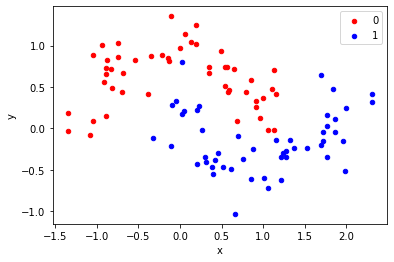

In [5]:
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

#### 6.1.1. Dataframe(dict())

[3]에서 아래와 같은 명령이 있었다. 그대로 시행해보면 복잡해보이는 어떤 dictionanry 형태의 자료가 출력된다.

In [6]:
dict(x=X[:,0], y=X[:,1], label=y)

{'x': array([ 1.36698238,  1.76404402, -0.37868174,  1.15113747,  2.31168314,
         0.53866045, -0.93583639,  1.32563024,  0.75398022,  0.42764536,
         1.86426147, -0.83255618,  0.22507434,  0.21098847,  0.05359594,
        -0.14691002, -0.75060111, -0.91043983,  1.21265683,  0.64660318,
         0.68237381,  0.61031853,  1.99715631,  0.2077874 ,  0.35027414,
        -0.68407286,  1.76290471, -0.13029538, -1.34872432, -0.879935  ,
         0.69322932,  2.30858186, -0.32283333,  1.76628178,  1.86869763,
        -0.81925203, -1.07708794, -0.10935722, -0.00275911, -0.74705081,
         1.72626831, -0.04902655,  1.27447994,  0.91687068,  1.21815598,
        -0.886625  , -0.89381479,  1.72422728,  0.13871945,  1.69682347,
        -0.89185761, -0.09457701, -0.10713202,  1.15027259,  0.27096453,
        -1.04069441,  0.49389774,  1.98289223,  0.96245599,  1.01374105,
        -0.35030927,  0.46258369,  0.52237109, -0.69719401, -1.34861991,
         1.95593429,  0.85676993,  0.38380987,

아주 간단한 형태의 dictionary는 아래와 같고

In [7]:
data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
data

{'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}

이 dictionary 형태의 대상을 DataFrame으로 바꾸는 명령은 다음과 같다.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.from_dict.html

In [8]:
pd.DataFrame.from_dict(data)

,col_1,col_2
0,3,a
1,2,b
2,1,c
3,0,d


[3]에서 쓴 명령의 형식으로도 완전히 똑같은 것을 수행할 수 있다.

In [9]:
DataFrame(data)

,col_1,col_2
0,3,a
1,2,b
2,1,c
3,0,d


## 6.1. Overfit Multilayer Perceptron

In [10]:
# mlp overfit on the moons dataset
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot

Using TensorFlow backend.


In [11]:
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

In [12]:
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [13]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# # another way to define a modelacc=0.914 (e.g.)
# # define model
# model = Sequential()
# model.add(Dense(500, input_dim=2, activation='relu'))
# model.add(Dense(2, activation='softmax'))
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=1)

Train on 30 samples, validate on 70 samples
Epoch 1/4000
30/30 [==============================] - 0s 6ms/step - loss: 0.6813 - accuracy: 0.7333 - val_loss: 0.6737 - val_accuracy: 0.7286
Epoch 2/4000
30/30 [==============================] - 0s 267us/step - loss: 0.6654 - accuracy: 0.8667 - val_loss: 0.6650 - val_accuracy: 0.7286
Epoch 3/4000
30/30 [==============================] - 0s 267us/step - loss: 0.6521 - accuracy: 0.9000 - val_loss: 0.6560 - val_accuracy: 0.7286
Epoch 4/4000
30/30 [==============================] - 0s 267us/step - loss: 0.6383 - accuracy: 0.9000 - val_loss: 0.6464 - val_accuracy: 0.7286
Epoch 5/4000
30/30 [==============================] - 0s 267us/step - loss: 0.6235 - accuracy: 0.9000 - val_loss: 0.6371 - val_accuracy: 0.7286
Epoch 6/4000
30/30 [==============================] - 0s 267us/step - loss: 0.6091 - accuracy: 0.9000 - val_loss: 0.6282 - val_accuracy: 0.7286
Epoch 7/4000
30/30 [==============================] - 0s 533us/step - loss: 0.5952 - accuracy:

Epoch 58/4000
30/30 [==============================] - 0s 0us/step - loss: 0.2381 - accuracy: 0.9000 - val_loss: 0.4462 - val_accuracy: 0.7429
Epoch 59/4000
30/30 [==============================] - 0s 0us/step - loss: 0.2357 - accuracy: 0.9000 - val_loss: 0.4456 - val_accuracy: 0.7429
Epoch 60/4000
30/30 [==============================] - 0s 0us/step - loss: 0.2335 - accuracy: 0.9000 - val_loss: 0.4450 - val_accuracy: 0.7429
Epoch 61/4000
30/30 [==============================] - 0s 267us/step - loss: 0.2313 - accuracy: 0.9000 - val_loss: 0.4445 - val_accuracy: 0.7429
Epoch 62/4000
30/30 [==============================] - 0s 267us/step - loss: 0.2292 - accuracy: 0.9000 - val_loss: 0.4439 - val_accuracy: 0.7429
Epoch 63/4000
30/30 [==============================] - 0s 267us/step - loss: 0.2273 - accuracy: 0.9000 - val_loss: 0.4434 - val_accuracy: 0.7429
Epoch 64/4000
30/30 [==============================] - 0s 267us/step - loss: 0.2253 - accuracy: 0.9000 - val_loss: 0.4429 - val_accuracy

Epoch 115/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1752 - accuracy: 0.9333 - val_loss: 0.4102 - val_accuracy: 0.7857
Epoch 116/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1747 - accuracy: 0.9333 - val_loss: 0.4094 - val_accuracy: 0.7857
Epoch 117/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1741 - accuracy: 0.9333 - val_loss: 0.4086 - val_accuracy: 0.8000
Epoch 118/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1735 - accuracy: 0.9333 - val_loss: 0.4078 - val_accuracy: 0.8000
Epoch 119/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1729 - accuracy: 0.9333 - val_loss: 0.4070 - val_accuracy: 0.8000
Epoch 120/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1724 - accuracy: 0.9333 - val_loss: 0.4062 - val_accuracy: 0.8000
Epoch 121/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1718 - accuracy: 0.9333 - val_loss: 0.4054 -

Epoch 172/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1512 - accuracy: 0.9667 - val_loss: 0.3761 - val_accuracy: 0.8286
Epoch 173/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1509 - accuracy: 0.9667 - val_loss: 0.3757 - val_accuracy: 0.8286
Epoch 174/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1506 - accuracy: 0.9667 - val_loss: 0.3754 - val_accuracy: 0.8286
Epoch 175/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1503 - accuracy: 0.9667 - val_loss: 0.3751 - val_accuracy: 0.8286
Epoch 176/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1500 - accuracy: 0.9667 - val_loss: 0.3748 - val_accuracy: 0.8286
Epoch 177/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1498 - accuracy: 0.9667 - val_loss: 0.3745 - val_accuracy: 0.8286
Epoch 178/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1495 - accuracy: 0.9667 - val_loss: 0.3742 - val_accurac

Epoch 229/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1400 - accuracy: 0.9667 - val_loss: 0.3688 - val_accuracy: 0.8143
Epoch 230/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1398 - accuracy: 0.9667 - val_loss: 0.3688 - val_accuracy: 0.8143
Epoch 231/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1397 - accuracy: 0.9667 - val_loss: 0.3689 - val_accuracy: 0.8143
Epoch 232/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1396 - accuracy: 0.9667 - val_loss: 0.3689 - val_accuracy: 0.8143
Epoch 233/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1394 - accuracy: 0.9667 - val_loss: 0.3689 - val_accuracy: 0.8143
Epoch 234/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1393 - accuracy: 0.9667 - val_loss: 0.3690 - val_accuracy: 0.8143
Epoch 235/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1392 - accuracy: 0.9667 - val_loss: 0.3690 -

Epoch 286/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1338 - accuracy: 0.9667 - val_loss: 0.3695 - val_accuracy: 0.8429
Epoch 287/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1337 - accuracy: 0.9667 - val_loss: 0.3695 - val_accuracy: 0.8429
Epoch 288/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1336 - accuracy: 0.9667 - val_loss: 0.3695 - val_accuracy: 0.8429
Epoch 289/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1335 - accuracy: 0.9667 - val_loss: 0.3695 - val_accuracy: 0.8429
Epoch 290/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1334 - accuracy: 0.9667 - val_loss: 0.3695 - val_accuracy: 0.8429
Epoch 291/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1333 - accuracy: 0.9667 - val_loss: 0.3695 - val_accuracy: 0.8429
Epoch 292/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1332 - accuracy: 0.9667 - val_loss: 0.3694 - val_accuracy:

Epoch 343/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1277 - accuracy: 0.9667 - val_loss: 0.3656 - val_accuracy: 0.8429
Epoch 344/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1276 - accuracy: 0.9667 - val_loss: 0.3655 - val_accuracy: 0.8429
Epoch 345/4000
30/30 [==============================] - 0s 279us/step - loss: 0.1275 - accuracy: 0.9667 - val_loss: 0.3653 - val_accuracy: 0.8429
Epoch 346/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1274 - accuracy: 0.9667 - val_loss: 0.3652 - val_accuracy: 0.8429
Epoch 347/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1273 - accuracy: 0.9667 - val_loss: 0.3651 - val_accuracy: 0.8429
Epoch 348/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1271 - accuracy: 0.9667 - val_loss: 0.3649 - val_accuracy: 0.8429
Epoch 349/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1270 - accuracy: 0.9667 - val_loss: 0.3648 - val_accur

Epoch 400/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1197 - accuracy: 0.9667 - val_loss: 0.3530 - val_accuracy: 0.8429
Epoch 401/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1195 - accuracy: 0.9667 - val_loss: 0.3527 - val_accuracy: 0.8429
Epoch 402/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1193 - accuracy: 0.9667 - val_loss: 0.3523 - val_accuracy: 0.8429
Epoch 403/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1191 - accuracy: 0.9667 - val_loss: 0.3519 - val_accuracy: 0.8429
Epoch 404/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1190 - accuracy: 0.9667 - val_loss: 0.3514 - val_accuracy: 0.8429
Epoch 405/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1188 - accuracy: 0.9667 - val_loss: 0.3510 - val_accuracy: 0.8429
Epoch 406/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1186 - accuracy: 0.9667 - val_loss: 0.3506 - val_accurac

Epoch 457/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1078 - accuracy: 0.9667 - val_loss: 0.3309 - val_accuracy: 0.8429
Epoch 458/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1076 - accuracy: 0.9667 - val_loss: 0.3305 - val_accuracy: 0.8429
Epoch 459/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1073 - accuracy: 0.9667 - val_loss: 0.3301 - val_accuracy: 0.8429
Epoch 460/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1071 - accuracy: 0.9667 - val_loss: 0.3298 - val_accuracy: 0.8429
Epoch 461/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1068 - accuracy: 0.9667 - val_loss: 0.3295 - val_accuracy: 0.8429
Epoch 462/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1066 - accuracy: 0.9667 - val_loss: 0.3291 - val_accuracy: 0.8429
Epoch 463/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1063 - accuracy: 0.9667 - val_loss: 0.3286 - val_a

Epoch 514/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0935 - accuracy: 0.9667 - val_loss: 0.3057 - val_accuracy: 0.8714
Epoch 515/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0933 - accuracy: 0.9667 - val_loss: 0.3053 - val_accuracy: 0.8714
Epoch 516/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0930 - accuracy: 0.9667 - val_loss: 0.3048 - val_accuracy: 0.8714
Epoch 517/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0928 - accuracy: 0.9667 - val_loss: 0.3043 - val_accuracy: 0.8714
Epoch 518/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0925 - accuracy: 0.9667 - val_loss: 0.3039 - val_accuracy: 0.8714
Epoch 519/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0922 - accuracy: 0.9667 - val_loss: 0.3034 - val_accuracy: 0.8714
Epoch 520/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0920 - accuracy: 0.9667 - val_loss: 0.3030 - val

Epoch 571/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0784 - accuracy: 0.9667 - val_loss: 0.2783 - val_accuracy: 0.9000
Epoch 572/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0782 - accuracy: 0.9667 - val_loss: 0.2779 - val_accuracy: 0.9000
Epoch 573/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0779 - accuracy: 0.9667 - val_loss: 0.2774 - val_accuracy: 0.9000
Epoch 574/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0776 - accuracy: 0.9667 - val_loss: 0.2769 - val_accuracy: 0.9000
Epoch 575/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0774 - accuracy: 0.9667 - val_loss: 0.2765 - val_accuracy: 0.9000
Epoch 576/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0771 - accuracy: 0.9667 - val_loss: 0.2760 - val_accuracy: 0.9000
Epoch 577/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0768 - accuracy: 0.9667 - val_loss: 0.2756 - val_accur

Epoch 628/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0633 - accuracy: 0.9667 - val_loss: 0.2550 - val_accuracy: 0.9286
Epoch 629/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0631 - accuracy: 0.9667 - val_loss: 0.2547 - val_accuracy: 0.9286
Epoch 630/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0628 - accuracy: 0.9667 - val_loss: 0.2543 - val_accuracy: 0.9286
Epoch 631/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0625 - accuracy: 0.9667 - val_loss: 0.2539 - val_accuracy: 0.9286
Epoch 632/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0623 - accuracy: 0.9667 - val_loss: 0.2536 - val_accuracy: 0.9286
Epoch 633/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0620 - accuracy: 0.9667 - val_loss: 0.2532 - val_accuracy: 0.9286
Epoch 634/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0618 - accuracy: 0.9667 - val_loss: 0.2528 -

Epoch 685/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0496 - accuracy: 0.9667 - val_loss: 0.2391 - val_accuracy: 0.9286
Epoch 686/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0494 - accuracy: 0.9667 - val_loss: 0.2388 - val_accuracy: 0.9286
Epoch 687/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0492 - accuracy: 0.9667 - val_loss: 0.2386 - val_accuracy: 0.9286
Epoch 688/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0489 - accuracy: 0.9667 - val_loss: 0.2384 - val_accuracy: 0.9286
Epoch 689/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0487 - accuracy: 1.0000 - val_loss: 0.2382 - val_accuracy: 0.9286
Epoch 690/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0485 - accuracy: 1.0000 - val_loss: 0.2380 - val_accuracy: 0.9286
Epoch 691/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0483 - accuracy: 1.0000 - val_loss: 0.2379 -

Epoch 742/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0384 - accuracy: 1.0000 - val_loss: 0.2304 - val_accuracy: 0.9286
Epoch 743/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0383 - accuracy: 1.0000 - val_loss: 0.2303 - val_accuracy: 0.9286
Epoch 744/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0381 - accuracy: 1.0000 - val_loss: 0.2302 - val_accuracy: 0.9286
Epoch 745/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0379 - accuracy: 1.0000 - val_loss: 0.2301 - val_accuracy: 0.9286
Epoch 746/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0378 - accuracy: 1.0000 - val_loss: 0.2301 - val_accuracy: 0.9286
Epoch 747/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0376 - accuracy: 1.0000 - val_loss: 0.2301 - val_accuracy: 0.9286
Epoch 748/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0374 - accuracy: 1.0000 - val_loss: 0.2300 - val_acc

Epoch 799/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0297 - accuracy: 1.0000 - val_loss: 0.2307 - val_accuracy: 0.9286
Epoch 800/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0296 - accuracy: 1.0000 - val_loss: 0.2307 - val_accuracy: 0.9286
Epoch 801/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0294 - accuracy: 1.0000 - val_loss: 0.2308 - val_accuracy: 0.9286
Epoch 802/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0293 - accuracy: 1.0000 - val_loss: 0.2309 - val_accuracy: 0.9286
Epoch 803/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0292 - accuracy: 1.0000 - val_loss: 0.2309 - val_accuracy: 0.9286
Epoch 804/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0290 - accuracy: 1.0000 - val_loss: 0.2310 - val_accuracy: 0.9286
Epoch 805/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0289 - accuracy: 1.0000 - val_loss: 0.2311 - val_accuracy:

Epoch 856/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0231 - accuracy: 1.0000 - val_loss: 0.2364 - val_accuracy: 0.9429
Epoch 857/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0230 - accuracy: 1.0000 - val_loss: 0.2365 - val_accuracy: 0.9429
Epoch 858/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0229 - accuracy: 1.0000 - val_loss: 0.2367 - val_accuracy: 0.9429
Epoch 859/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0228 - accuracy: 1.0000 - val_loss: 0.2368 - val_accuracy: 0.9429
Epoch 860/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0227 - accuracy: 1.0000 - val_loss: 0.2369 - val_accuracy: 0.9429
Epoch 861/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0226 - accuracy: 1.0000 - val_loss: 0.2371 - val_accuracy: 0.9429
Epoch 862/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0225 - accuracy: 1.0000 - val_loss: 0.2372 - v

Epoch 913/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0182 - accuracy: 1.0000 - val_loss: 0.2434 - val_accuracy: 0.9429
Epoch 914/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0182 - accuracy: 1.0000 - val_loss: 0.2436 - val_accuracy: 0.9429
Epoch 915/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0181 - accuracy: 1.0000 - val_loss: 0.2437 - val_accuracy: 0.9429
Epoch 916/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0180 - accuracy: 1.0000 - val_loss: 0.2438 - val_accuracy: 0.9429
Epoch 917/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0180 - accuracy: 1.0000 - val_loss: 0.2439 - val_accuracy: 0.9429
Epoch 918/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0179 - accuracy: 1.0000 - val_loss: 0.2441 - val_accuracy: 0.9429
Epoch 919/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0178 - accuracy: 1.0000 - val_loss: 0.2442 -

Epoch 970/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.2516 - val_accuracy: 0.9429
Epoch 971/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.2517 - val_accuracy: 0.9429
Epoch 972/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 0.2519 - val_accuracy: 0.9429
Epoch 973/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 0.2520 - val_accuracy: 0.9429
Epoch 974/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 0.2522 - val_accuracy: 0.9429
Epoch 975/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0143 - accuracy: 1.0000 - val_loss: 0.2524 - val_accuracy: 0.9429
Epoch 976/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0143 - accuracy: 1.0000 - val_loss: 0.2526 - val_a

Epoch 1027/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.2606 - val_accuracy: 0.9429
Epoch 1028/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.2608 - val_accuracy: 0.9429
Epoch 1029/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.2609 - val_accuracy: 0.9429
Epoch 1030/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.2611 - val_accuracy: 0.9429
Epoch 1031/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.2612 - val_accuracy: 0.9429
Epoch 1032/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.2614 - val_accuracy: 0.9429
Epoch 1033/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0

Epoch 1083/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.2687 - val_accuracy: 0.9429
Epoch 1084/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.2689 - val_accuracy: 0.9429
Epoch 1085/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.2691 - val_accuracy: 0.9429
Epoch 1086/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.2692 - val_accuracy: 0.9429
Epoch 1087/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.2693 - val_accuracy: 0.9429
Epoch 1088/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.2695 - val_accuracy: 0.9429
Epoch 1089/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.2696 - va

30/30 [==============================] - 0s 267us/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.2768 - val_accuracy: 0.9429
Epoch 1140/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.2769 - val_accuracy: 0.9429
Epoch 1141/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.2771 - val_accuracy: 0.9429
Epoch 1142/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.2772 - val_accuracy: 0.9429
Epoch 1143/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.2774 - val_accuracy: 0.9429
Epoch 1144/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.2775 - val_accuracy: 0.9429
Epoch 1145/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.2777 - val_accu

Epoch 1196/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.2851 - val_accuracy: 0.9429
Epoch 1197/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.2852 - val_accuracy: 0.9429
Epoch 1198/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.2853 - val_accuracy: 0.9429
Epoch 1199/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.2855 - val_accuracy: 0.9429
Epoch 1200/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.2856 - val_accuracy: 0.9429
Epoch 1201/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.2858 - val_accuracy: 0.9429
Epoch 1202/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.285

Epoch 1252/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.2926 - val_accuracy: 0.9429
Epoch 1253/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.2928 - val_accuracy: 0.9429
Epoch 1254/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.2929 - val_accuracy: 0.9429
Epoch 1255/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.2930 - val_accuracy: 0.9429
Epoch 1256/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.2932 - val_accuracy: 0.9429
Epoch 1257/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.2933 - val_accuracy: 0.9429
Epoch 1258/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.2934 

Epoch 1308/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.2999 - val_accuracy: 0.9429
Epoch 1309/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.3000 - val_accuracy: 0.9429
Epoch 1310/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.3002 - val_accuracy: 0.9429
Epoch 1311/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.3003 - val_accuracy: 0.9429
Epoch 1312/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.3004 - val_accuracy: 0.9429
Epoch 1313/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.3006 - val_accuracy: 0.9429
Epoch 1314/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0

Epoch 1364/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.3068 - val_accuracy: 0.9286
Epoch 1365/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.3069 - val_accuracy: 0.9286
Epoch 1366/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.3070 - val_accuracy: 0.9286
Epoch 1367/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.3072 - val_accuracy: 0.9286
Epoch 1368/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.3073 - val_accuracy: 0.9286
Epoch 1369/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.3074 - val_accuracy: 0.9286
Epoch 1370/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.3075 - val_

Epoch 1421/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.3136 - val_accuracy: 0.9286
Epoch 1422/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.3137 - val_accuracy: 0.9286
Epoch 1423/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.3138 - val_accuracy: 0.9286
Epoch 1424/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.3140 - val_accuracy: 0.9286
Epoch 1425/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.3141 - val_accuracy: 0.9286
Epoch 1426/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.3142 - val_accuracy: 0.9286
Epoch 1427/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0

Epoch 1477/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3200 - val_accuracy: 0.9286
Epoch 1478/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3201 - val_accuracy: 0.9286
Epoch 1479/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3202 - val_accuracy: 0.9286
Epoch 1480/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.3204 - val_accuracy: 0.9286
Epoch 1481/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.3205 - val_accuracy: 0.9286
Epoch 1482/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.3206 - val_accuracy: 0.9286
Epoch 1483/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0

Epoch 1533/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3262 - val_accuracy: 0.9286
Epoch 1534/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3263 - val_accuracy: 0.9286
Epoch 1535/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3264 - val_accuracy: 0.9286
Epoch 1536/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3265 - val_accuracy: 0.9286
Epoch 1537/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3266 - val_accuracy: 0.9286
Epoch 1538/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3267 - val_accuracy: 0.9286
Epoch 1539/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0

Epoch 1590/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3323 - val_accuracy: 0.9286
Epoch 1591/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3324 - val_accuracy: 0.9286
Epoch 1592/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.3325 - val_accuracy: 0.9286
Epoch 1593/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.3326 - val_accuracy: 0.9286
Epoch 1594/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.3327 - val_accuracy: 0.9286
Epoch 1595/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.3329 - val_accuracy: 0.9286
Epoch 1596/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.333

Epoch 1647/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3383 - val_accuracy: 0.9286
Epoch 1648/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3384 - val_accuracy: 0.9286
Epoch 1649/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3385 - val_accuracy: 0.9286
Epoch 1650/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3386 - val_accuracy: 0.9286
Epoch 1651/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3387 - val_accuracy: 0.9286
Epoch 1652/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3388 - val_accuracy: 0.9286
Epoch 1653/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.338

Epoch 1704/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3440 - val_accuracy: 0.9286
Epoch 1705/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3441 - val_accuracy: 0.9286
Epoch 1706/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3442 - val_accuracy: 0.9286
Epoch 1707/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3443 - val_accuracy: 0.9286
Epoch 1708/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3444 - val_accuracy: 0.9286
Epoch 1709/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3445 - val_accuracy: 0.9286
Epoch 1710/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3446 - val_

Epoch 1760/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3495 - val_accuracy: 0.9286
Epoch 1761/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3496 - val_accuracy: 0.9286
Epoch 1762/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3497 - val_accuracy: 0.9286
Epoch 1763/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3497 - val_accuracy: 0.9286
Epoch 1764/4000
30/30 [==============================] - 0s 266us/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3498 - val_accuracy: 0.9286
Epoch 1765/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3499 - val_accuracy: 0.9286
Epoch 1766/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3500 - 

Epoch 1817/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3547 - val_accuracy: 0.9286
Epoch 1818/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3548 - val_accuracy: 0.9286
Epoch 1819/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3549 - val_accuracy: 0.9286
Epoch 1820/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3550 - val_accuracy: 0.9286
Epoch 1821/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3551 - val_accuracy: 0.9286
Epoch 1822/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3552 - val_accuracy: 0.9286
Epoch 1823/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3552 

Epoch 1873/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3598 - val_accuracy: 0.9286
Epoch 1874/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3599 - val_accuracy: 0.9286
Epoch 1875/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3599 - val_accuracy: 0.9286
Epoch 1876/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3600 - val_accuracy: 0.9286
Epoch 1877/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3601 - val_accuracy: 0.9286
Epoch 1878/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3602 - val_accuracy: 0.9286
Epoch 1879/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0

Epoch 1929/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3647 - val_accuracy: 0.9286
Epoch 1930/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3648 - val_accuracy: 0.9286
Epoch 1931/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3649 - val_accuracy: 0.9286
Epoch 1932/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3650 - val_accuracy: 0.9286
Epoch 1933/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3651 - val_accuracy: 0.9286
Epoch 1934/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3652 - val_accuracy: 0.9286
Epoch 1935/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3653 - val_ac

Epoch 1986/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3696 - val_accuracy: 0.9286
Epoch 1987/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3697 - val_accuracy: 0.9286
Epoch 1988/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3698 - val_accuracy: 0.9286
Epoch 1989/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3699 - val_accuracy: 0.9286
Epoch 1990/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3699 - val_accuracy: 0.9286
Epoch 1991/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3700 - val_accuracy: 0.9286
Epoch 1992/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3701 - va

Epoch 2042/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3743 - val_accuracy: 0.9286
Epoch 2043/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3744 - val_accuracy: 0.9286
Epoch 2044/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3745 - val_accuracy: 0.9286
Epoch 2045/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3746 - val_accuracy: 0.9286
Epoch 2046/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3747 - val_accuracy: 0.9286
Epoch 2047/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3747 - val_accuracy: 0.9286
Epoch 2048/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3748 - 

Epoch 2098/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3789 - val_accuracy: 0.9286
Epoch 2099/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3790 - val_accuracy: 0.9286
Epoch 2100/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3790 - val_accuracy: 0.9286
Epoch 2101/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3791 - val_accuracy: 0.9286
Epoch 2102/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3792 - val_accuracy: 0.9286
Epoch 2103/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3793 - val_accuracy: 0.9286
Epoch 2104/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3

Epoch 2154/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3833 - val_accuracy: 0.9286
Epoch 2155/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3834 - val_accuracy: 0.9286
Epoch 2156/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3834 - val_accuracy: 0.9286
Epoch 2157/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3835 - val_accuracy: 0.9286
Epoch 2158/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3836 - val_accuracy: 0.9286
Epoch 2159/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3837 - val_accuracy: 0.9286
Epoch 2160/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0

Epoch 2210/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3876 - val_accuracy: 0.9286
Epoch 2211/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3876 - val_accuracy: 0.9286
Epoch 2212/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3877 - val_accuracy: 0.9286
Epoch 2213/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3878 - val_accuracy: 0.9286
Epoch 2214/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3879 - val_accuracy: 0.9286
Epoch 2215/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3880 - val_accuracy: 0.9286
Epoch 2216/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.388

Epoch 2266/4000
30/30 [==============================] - 0s 267us/step - loss: 9.7308e-04 - accuracy: 1.0000 - val_loss: 0.3918 - val_accuracy: 0.9286
Epoch 2267/4000
30/30 [==============================] - 0s 267us/step - loss: 9.7187e-04 - accuracy: 1.0000 - val_loss: 0.3919 - val_accuracy: 0.9286
Epoch 2268/4000
30/30 [==============================] - 0s 267us/step - loss: 9.7064e-04 - accuracy: 1.0000 - val_loss: 0.3920 - val_accuracy: 0.9286
Epoch 2269/4000
30/30 [==============================] - 0s 267us/step - loss: 9.6940e-04 - accuracy: 1.0000 - val_loss: 0.3920 - val_accuracy: 0.9286
Epoch 2270/4000
30/30 [==============================] - 0s 267us/step - loss: 9.6811e-04 - accuracy: 1.0000 - val_loss: 0.3921 - val_accuracy: 0.9286
Epoch 2271/4000
30/30 [==============================] - 0s 266us/step - loss: 9.6686e-04 - accuracy: 1.0000 - val_loss: 0.3922 - val_accuracy: 0.9286
Epoch 2272/4000
30/30 [==============================] - 0s 267us/step - loss: 9.6569e-04 - ac

Epoch 2321/4000
30/30 [==============================] - 0s 0us/step - loss: 9.0839e-04 - accuracy: 1.0000 - val_loss: 0.3959 - val_accuracy: 0.9286
Epoch 2322/4000
30/30 [==============================] - 0s 267us/step - loss: 9.0731e-04 - accuracy: 1.0000 - val_loss: 0.3960 - val_accuracy: 0.9286
Epoch 2323/4000
30/30 [==============================] - 0s 267us/step - loss: 9.0613e-04 - accuracy: 1.0000 - val_loss: 0.3960 - val_accuracy: 0.9286
Epoch 2324/4000
30/30 [==============================] - 0s 267us/step - loss: 9.0500e-04 - accuracy: 1.0000 - val_loss: 0.3961 - val_accuracy: 0.9286
Epoch 2325/4000
30/30 [==============================] - 0s 267us/step - loss: 9.0392e-04 - accuracy: 1.0000 - val_loss: 0.3962 - val_accuracy: 0.9286
Epoch 2326/4000
30/30 [==============================] - 0s 267us/step - loss: 9.0281e-04 - accuracy: 1.0000 - val_loss: 0.3962 - val_accuracy: 0.9286
Epoch 2327/4000
30/30 [==============================] - 0s 267us/step - loss: 9.0168e-04 - accu

Epoch 2376/4000
30/30 [==============================] - 0s 267us/step - loss: 8.4945e-04 - accuracy: 1.0000 - val_loss: 0.3999 - val_accuracy: 0.9286
Epoch 2377/4000
30/30 [==============================] - 0s 267us/step - loss: 8.4845e-04 - accuracy: 1.0000 - val_loss: 0.4000 - val_accuracy: 0.9286
Epoch 2378/4000
30/30 [==============================] - 0s 312us/step - loss: 8.4738e-04 - accuracy: 1.0000 - val_loss: 0.4000 - val_accuracy: 0.9286
Epoch 2379/4000
30/30 [==============================] - 0s 267us/step - loss: 8.4634e-04 - accuracy: 1.0000 - val_loss: 0.4001 - val_accuracy: 0.9286
Epoch 2380/4000
30/30 [==============================] - 0s 267us/step - loss: 8.4535e-04 - accuracy: 1.0000 - val_loss: 0.4002 - val_accuracy: 0.9286
Epoch 2381/4000
30/30 [==============================] - 0s 267us/step - loss: 8.4433e-04 - accuracy: 1.0000 - val_loss: 0.4002 - val_accuracy: 0.9286
Epoch 2382/4000
30/30 [==============================] - 0s 267us/step - loss: 8.4331e-04 - ac

Epoch 2431/4000
30/30 [==============================] - 0s 267us/step - loss: 7.9557e-04 - accuracy: 1.0000 - val_loss: 0.4038 - val_accuracy: 0.9143
Epoch 2432/4000
30/30 [==============================] - 0s 267us/step - loss: 7.9464e-04 - accuracy: 1.0000 - val_loss: 0.4039 - val_accuracy: 0.9143
Epoch 2433/4000
30/30 [==============================] - 0s 267us/step - loss: 7.9372e-04 - accuracy: 1.0000 - val_loss: 0.4039 - val_accuracy: 0.9143
Epoch 2434/4000
30/30 [==============================] - 0s 267us/step - loss: 7.9278e-04 - accuracy: 1.0000 - val_loss: 0.4040 - val_accuracy: 0.9143
Epoch 2435/4000
30/30 [==============================] - 0s 267us/step - loss: 7.9179e-04 - accuracy: 1.0000 - val_loss: 0.4041 - val_accuracy: 0.9143
Epoch 2436/4000
30/30 [==============================] - 0s 267us/step - loss: 7.9088e-04 - accuracy: 1.0000 - val_loss: 0.4041 - val_accuracy: 0.9143
Epoch 2437/4000
30/30 [==============================] - 0s 267us/step - loss: 7.8998e-04 - ac

Epoch 2486/4000
30/30 [==============================] - 0s 0us/step - loss: 7.4618e-04 - accuracy: 1.0000 - val_loss: 0.4076 - val_accuracy: 0.9143
Epoch 2487/4000
30/30 [==============================] - 0s 0us/step - loss: 7.4524e-04 - accuracy: 1.0000 - val_loss: 0.4077 - val_accuracy: 0.9143
Epoch 2488/4000
30/30 [==============================] - 0s 0us/step - loss: 7.4438e-04 - accuracy: 1.0000 - val_loss: 0.4078 - val_accuracy: 0.9143
Epoch 2489/4000
30/30 [==============================] - 0s 0us/step - loss: 7.4356e-04 - accuracy: 1.0000 - val_loss: 0.4078 - val_accuracy: 0.9143
Epoch 2490/4000
30/30 [==============================] - 0s 0us/step - loss: 7.4277e-04 - accuracy: 1.0000 - val_loss: 0.4079 - val_accuracy: 0.9143
Epoch 2491/4000
30/30 [==============================] - 0s 0us/step - loss: 7.4189e-04 - accuracy: 1.0000 - val_loss: 0.4080 - val_accuracy: 0.9143
Epoch 2492/4000
30/30 [==============================] - 0s 0us/step - loss: 7.4096e-04 - accuracy: 1.0000

Epoch 2541/4000
30/30 [==============================] - 0s 267us/step - loss: 7.0075e-04 - accuracy: 1.0000 - val_loss: 0.4114 - val_accuracy: 0.9143
Epoch 2542/4000
30/30 [==============================] - 0s 267us/step - loss: 6.9993e-04 - accuracy: 1.0000 - val_loss: 0.4115 - val_accuracy: 0.9143
Epoch 2543/4000
30/30 [==============================] - 0s 267us/step - loss: 6.9918e-04 - accuracy: 1.0000 - val_loss: 0.4116 - val_accuracy: 0.9143
Epoch 2544/4000
30/30 [==============================] - 0s 267us/step - loss: 6.9840e-04 - accuracy: 1.0000 - val_loss: 0.4116 - val_accuracy: 0.9143
Epoch 2545/4000
30/30 [==============================] - 0s 0us/step - loss: 6.9759e-04 - accuracy: 1.0000 - val_loss: 0.4117 - val_accuracy: 0.9143
Epoch 2546/4000
30/30 [==============================] - 0s 267us/step - loss: 6.9681e-04 - accuracy: 1.0000 - val_loss: 0.4117 - val_accuracy: 0.9143
Epoch 2547/4000
30/30 [==============================] - 0s 267us/step - loss: 6.9601e-04 - accu

Epoch 2596/4000
30/30 [==============================] - 0s 266us/step - loss: 6.5893e-04 - accuracy: 1.0000 - val_loss: 0.4151 - val_accuracy: 0.9143
Epoch 2597/4000
30/30 [==============================] - 0s 267us/step - loss: 6.5817e-04 - accuracy: 1.0000 - val_loss: 0.4152 - val_accuracy: 0.9143
Epoch 2598/4000
30/30 [==============================] - 0s 304us/step - loss: 6.5742e-04 - accuracy: 1.0000 - val_loss: 0.4152 - val_accuracy: 0.9143
Epoch 2599/4000
30/30 [==============================] - 0s 267us/step - loss: 6.5668e-04 - accuracy: 1.0000 - val_loss: 0.4153 - val_accuracy: 0.9143
Epoch 2600/4000
30/30 [==============================] - 0s 267us/step - loss: 6.5595e-04 - accuracy: 1.0000 - val_loss: 0.4154 - val_accuracy: 0.9143
Epoch 2601/4000
30/30 [==============================] - 0s 267us/step - loss: 6.5523e-04 - accuracy: 1.0000 - val_loss: 0.4154 - val_accuracy: 0.9143
Epoch 2602/4000
30/30 [==============================] - 0s 267us/step - loss: 6.5451e-04 - ac

Epoch 2651/4000
30/30 [==============================] - 0s 267us/step - loss: 6.2027e-04 - accuracy: 1.0000 - val_loss: 0.4187 - val_accuracy: 0.9143
Epoch 2652/4000
30/30 [==============================] - 0s 267us/step - loss: 6.1960e-04 - accuracy: 1.0000 - val_loss: 0.4188 - val_accuracy: 0.9143
Epoch 2653/4000
30/30 [==============================] - 0s 267us/step - loss: 6.1891e-04 - accuracy: 1.0000 - val_loss: 0.4189 - val_accuracy: 0.9143
Epoch 2654/4000
30/30 [==============================] - 0s 267us/step - loss: 6.1824e-04 - accuracy: 1.0000 - val_loss: 0.4189 - val_accuracy: 0.9143
Epoch 2655/4000
30/30 [==============================] - 0s 267us/step - loss: 6.1756e-04 - accuracy: 1.0000 - val_loss: 0.4190 - val_accuracy: 0.9143
Epoch 2656/4000
30/30 [==============================] - 0s 267us/step - loss: 6.1691e-04 - accuracy: 1.0000 - val_loss: 0.4190 - val_accuracy: 0.9143
Epoch 2657/4000
30/30 [==============================] - 0s 267us/step - loss: 6.1623e-04 - ac

Epoch 2706/4000
30/30 [==============================] - 0s 267us/step - loss: 5.8455e-04 - accuracy: 1.0000 - val_loss: 0.4223 - val_accuracy: 0.9143
Epoch 2707/4000
30/30 [==============================] - 0s 267us/step - loss: 5.8393e-04 - accuracy: 1.0000 - val_loss: 0.4223 - val_accuracy: 0.9143
Epoch 2708/4000
30/30 [==============================] - 0s 267us/step - loss: 5.8329e-04 - accuracy: 1.0000 - val_loss: 0.4224 - val_accuracy: 0.9143
Epoch 2709/4000
30/30 [==============================] - 0s 267us/step - loss: 5.8267e-04 - accuracy: 1.0000 - val_loss: 0.4225 - val_accuracy: 0.9143
Epoch 2710/4000
30/30 [==============================] - 0s 267us/step - loss: 5.8206e-04 - accuracy: 1.0000 - val_loss: 0.4225 - val_accuracy: 0.9143
Epoch 2711/4000
30/30 [==============================] - 0s 267us/step - loss: 5.8144e-04 - accuracy: 1.0000 - val_loss: 0.4226 - val_accuracy: 0.9143
Epoch 2712/4000
30/30 [==============================] - 0s 0us/step - loss: 5.8081e-04 - accu

Epoch 2761/4000
30/30 [==============================] - 0s 267us/step - loss: 5.5151e-04 - accuracy: 1.0000 - val_loss: 0.4258 - val_accuracy: 0.9143
Epoch 2762/4000
30/30 [==============================] - 0s 267us/step - loss: 5.5091e-04 - accuracy: 1.0000 - val_loss: 0.4258 - val_accuracy: 0.9143
Epoch 2763/4000
30/30 [==============================] - 0s 267us/step - loss: 5.5036e-04 - accuracy: 1.0000 - val_loss: 0.4259 - val_accuracy: 0.9143
Epoch 2764/4000
30/30 [==============================] - 0s 267us/step - loss: 5.4976e-04 - accuracy: 1.0000 - val_loss: 0.4260 - val_accuracy: 0.9143
Epoch 2765/4000
30/30 [==============================] - 0s 267us/step - loss: 5.4921e-04 - accuracy: 1.0000 - val_loss: 0.4260 - val_accuracy: 0.9143
Epoch 2766/4000
30/30 [==============================] - 0s 267us/step - loss: 5.4864e-04 - accuracy: 1.0000 - val_loss: 0.4261 - val_accuracy: 0.9143
Epoch 2767/4000
30/30 [==============================] - 0s 266us/step - loss: 5.4806e-04 - ac

Epoch 2816/4000
30/30 [==============================] - 0s 267us/step - loss: 5.2088e-04 - accuracy: 1.0000 - val_loss: 0.4292 - val_accuracy: 0.9143
Epoch 2817/4000
30/30 [==============================] - 0s 267us/step - loss: 5.2036e-04 - accuracy: 1.0000 - val_loss: 0.4293 - val_accuracy: 0.9143
Epoch 2818/4000
30/30 [==============================] - 0s 267us/step - loss: 5.1979e-04 - accuracy: 1.0000 - val_loss: 0.4294 - val_accuracy: 0.9143
Epoch 2819/4000
30/30 [==============================] - 0s 267us/step - loss: 5.1923e-04 - accuracy: 1.0000 - val_loss: 0.4294 - val_accuracy: 0.9143
Epoch 2820/4000
30/30 [==============================] - 0s 267us/step - loss: 5.1870e-04 - accuracy: 1.0000 - val_loss: 0.4295 - val_accuracy: 0.9143
Epoch 2821/4000
30/30 [==============================] - 0s 267us/step - loss: 5.1816e-04 - accuracy: 1.0000 - val_loss: 0.4296 - val_accuracy: 0.9143
Epoch 2822/4000
30/30 [==============================] - 0s 267us/step - loss: 5.1764e-04 - ac

Epoch 2871/4000
30/30 [==============================] - 0s 267us/step - loss: 4.9237e-04 - accuracy: 1.0000 - val_loss: 0.4326 - val_accuracy: 0.9143
Epoch 2872/4000
30/30 [==============================] - 0s 267us/step - loss: 4.9187e-04 - accuracy: 1.0000 - val_loss: 0.4327 - val_accuracy: 0.9143
Epoch 2873/4000
30/30 [==============================] - 0s 267us/step - loss: 4.9139e-04 - accuracy: 1.0000 - val_loss: 0.4328 - val_accuracy: 0.9143
Epoch 2874/4000
30/30 [==============================] - 0s 267us/step - loss: 4.9090e-04 - accuracy: 1.0000 - val_loss: 0.4328 - val_accuracy: 0.9143
Epoch 2875/4000
30/30 [==============================] - 0s 267us/step - loss: 4.9038e-04 - accuracy: 1.0000 - val_loss: 0.4329 - val_accuracy: 0.9143
Epoch 2876/4000
30/30 [==============================] - 0s 267us/step - loss: 4.8987e-04 - accuracy: 1.0000 - val_loss: 0.4330 - val_accuracy: 0.9143
Epoch 2877/4000
30/30 [==============================] - 0s 267us/step - loss: 4.8937e-04 - ac

Epoch 2926/4000
30/30 [==============================] - 0s 267us/step - loss: 4.6587e-04 - accuracy: 1.0000 - val_loss: 0.4360 - val_accuracy: 0.9143
Epoch 2927/4000
30/30 [==============================] - 0s 267us/step - loss: 4.6539e-04 - accuracy: 1.0000 - val_loss: 0.4361 - val_accuracy: 0.9143
Epoch 2928/4000
30/30 [==============================] - 0s 267us/step - loss: 4.6492e-04 - accuracy: 1.0000 - val_loss: 0.4361 - val_accuracy: 0.9143
Epoch 2929/4000
30/30 [==============================] - 0s 267us/step - loss: 4.6449e-04 - accuracy: 1.0000 - val_loss: 0.4362 - val_accuracy: 0.9143
Epoch 2930/4000
30/30 [==============================] - 0s 0us/step - loss: 4.6403e-04 - accuracy: 1.0000 - val_loss: 0.4363 - val_accuracy: 0.9143
Epoch 2931/4000
30/30 [==============================] - 0s 0us/step - loss: 4.6356e-04 - accuracy: 1.0000 - val_loss: 0.4363 - val_accuracy: 0.9143
Epoch 2932/4000
30/30 [==============================] - 0s 0us/step - loss: 4.6308e-04 - accuracy

Epoch 2981/4000
30/30 [==============================] - 0s 267us/step - loss: 4.4116e-04 - accuracy: 1.0000 - val_loss: 0.4394 - val_accuracy: 0.9143
Epoch 2982/4000
30/30 [==============================] - 0s 267us/step - loss: 4.4074e-04 - accuracy: 1.0000 - val_loss: 0.4394 - val_accuracy: 0.9143
Epoch 2983/4000
30/30 [==============================] - 0s 267us/step - loss: 4.4030e-04 - accuracy: 1.0000 - val_loss: 0.4395 - val_accuracy: 0.9143
Epoch 2984/4000
30/30 [==============================] - 0s 267us/step - loss: 4.3988e-04 - accuracy: 1.0000 - val_loss: 0.4396 - val_accuracy: 0.9143
Epoch 2985/4000
30/30 [==============================] - 0s 267us/step - loss: 4.3944e-04 - accuracy: 1.0000 - val_loss: 0.4396 - val_accuracy: 0.9143
Epoch 2986/4000
30/30 [==============================] - 0s 267us/step - loss: 4.3902e-04 - accuracy: 1.0000 - val_loss: 0.4397 - val_accuracy: 0.9143
Epoch 2987/4000
30/30 [==============================] - 0s 267us/step - loss: 4.3859e-04 - ac

Epoch 3036/4000
30/30 [==============================] - 0s 0us/step - loss: 4.1819e-04 - accuracy: 1.0000 - val_loss: 0.4427 - val_accuracy: 0.9143
Epoch 3037/4000
30/30 [==============================] - 0s 0us/step - loss: 4.1778e-04 - accuracy: 1.0000 - val_loss: 0.4428 - val_accuracy: 0.9143
Epoch 3038/4000
30/30 [==============================] - 0s 0us/step - loss: 4.1737e-04 - accuracy: 1.0000 - val_loss: 0.4428 - val_accuracy: 0.9143
Epoch 3039/4000
30/30 [==============================] - 0s 267us/step - loss: 4.1696e-04 - accuracy: 1.0000 - val_loss: 0.4429 - val_accuracy: 0.9143
Epoch 3040/4000
30/30 [==============================] - 0s 304us/step - loss: 4.1657e-04 - accuracy: 1.0000 - val_loss: 0.4429 - val_accuracy: 0.9143
Epoch 3041/4000
30/30 [==============================] - 0s 267us/step - loss: 4.1618e-04 - accuracy: 1.0000 - val_loss: 0.4430 - val_accuracy: 0.9143
Epoch 3042/4000
30/30 [==============================] - 0s 267us/step - loss: 4.1579e-04 - accuracy

Epoch 3091/4000
30/30 [==============================] - 0s 267us/step - loss: 3.9672e-04 - accuracy: 1.0000 - val_loss: 0.4460 - val_accuracy: 0.9143
Epoch 3092/4000
30/30 [==============================] - 0s 0us/step - loss: 3.9634e-04 - accuracy: 1.0000 - val_loss: 0.4460 - val_accuracy: 0.9143
Epoch 3093/4000
30/30 [==============================] - 0s 267us/step - loss: 3.9597e-04 - accuracy: 1.0000 - val_loss: 0.4461 - val_accuracy: 0.9143
Epoch 3094/4000
30/30 [==============================] - 0s 0us/step - loss: 3.9558e-04 - accuracy: 1.0000 - val_loss: 0.4461 - val_accuracy: 0.9143
Epoch 3095/4000
30/30 [==============================] - 0s 267us/step - loss: 3.9521e-04 - accuracy: 1.0000 - val_loss: 0.4462 - val_accuracy: 0.9143
Epoch 3096/4000
30/30 [==============================] - 0s 267us/step - loss: 3.9484e-04 - accuracy: 1.0000 - val_loss: 0.4463 - val_accuracy: 0.9143
Epoch 3097/4000
30/30 [==============================] - 0s 267us/step - loss: 3.9447e-04 - accura

Epoch 3146/4000
30/30 [==============================] - 0s 0us/step - loss: 3.7665e-04 - accuracy: 1.0000 - val_loss: 0.4492 - val_accuracy: 0.9143
Epoch 3147/4000
30/30 [==============================] - 0s 267us/step - loss: 3.7630e-04 - accuracy: 1.0000 - val_loss: 0.4492 - val_accuracy: 0.9143
Epoch 3148/4000
30/30 [==============================] - 0s 0us/step - loss: 3.7595e-04 - accuracy: 1.0000 - val_loss: 0.4493 - val_accuracy: 0.9143
Epoch 3149/4000
30/30 [==============================] - 0s 0us/step - loss: 3.7560e-04 - accuracy: 1.0000 - val_loss: 0.4493 - val_accuracy: 0.9143
Epoch 3150/4000
30/30 [==============================] - 0s 267us/step - loss: 3.7525e-04 - accuracy: 1.0000 - val_loss: 0.4494 - val_accuracy: 0.9143
Epoch 3151/4000
30/30 [==============================] - 0s 267us/step - loss: 3.7488e-04 - accuracy: 1.0000 - val_loss: 0.4495 - val_accuracy: 0.9143
Epoch 3152/4000
30/30 [==============================] - 0s 267us/step - loss: 3.7452e-04 - accuracy

Epoch 3201/4000
30/30 [==============================] - 0s 267us/step - loss: 3.5784e-04 - accuracy: 1.0000 - val_loss: 0.4524 - val_accuracy: 0.9143
Epoch 3202/4000
30/30 [==============================] - 0s 267us/step - loss: 3.5751e-04 - accuracy: 1.0000 - val_loss: 0.4524 - val_accuracy: 0.9143
Epoch 3203/4000
30/30 [==============================] - 0s 267us/step - loss: 3.5718e-04 - accuracy: 1.0000 - val_loss: 0.4525 - val_accuracy: 0.9143
Epoch 3204/4000
30/30 [==============================] - 0s 267us/step - loss: 3.5684e-04 - accuracy: 1.0000 - val_loss: 0.4525 - val_accuracy: 0.9143
Epoch 3205/4000
30/30 [==============================] - 0s 267us/step - loss: 3.5651e-04 - accuracy: 1.0000 - val_loss: 0.4526 - val_accuracy: 0.9143
Epoch 3206/4000
30/30 [==============================] - 0s 267us/step - loss: 3.5618e-04 - accuracy: 1.0000 - val_loss: 0.4526 - val_accuracy: 0.9143
Epoch 3207/4000
30/30 [==============================] - 0s 0us/step - loss: 3.5584e-04 - accu

Epoch 3256/4000
30/30 [==============================] - 0s 0us/step - loss: 3.4019e-04 - accuracy: 1.0000 - val_loss: 0.4555 - val_accuracy: 0.9143
Epoch 3257/4000
30/30 [==============================] - 0s 0us/step - loss: 3.3988e-04 - accuracy: 1.0000 - val_loss: 0.4555 - val_accuracy: 0.9143
Epoch 3258/4000
30/30 [==============================] - 0s 0us/step - loss: 3.3960e-04 - accuracy: 1.0000 - val_loss: 0.4556 - val_accuracy: 0.9143
Epoch 3259/4000
30/30 [==============================] - 0s 0us/step - loss: 3.3930e-04 - accuracy: 1.0000 - val_loss: 0.4557 - val_accuracy: 0.9143
Epoch 3260/4000
30/30 [==============================] - 0s 0us/step - loss: 3.3896e-04 - accuracy: 1.0000 - val_loss: 0.4557 - val_accuracy: 0.9143
Epoch 3261/4000
30/30 [==============================] - 0s 0us/step - loss: 3.3865e-04 - accuracy: 1.0000 - val_loss: 0.4558 - val_accuracy: 0.9143
Epoch 3262/4000
30/30 [==============================] - 0s 0us/step - loss: 3.3834e-04 - accuracy: 1.0000

Epoch 3311/4000
30/30 [==============================] - 0s 267us/step - loss: 3.2367e-04 - accuracy: 1.0000 - val_loss: 0.4586 - val_accuracy: 0.9143
Epoch 3312/4000
30/30 [==============================] - 0s 267us/step - loss: 3.2336e-04 - accuracy: 1.0000 - val_loss: 0.4586 - val_accuracy: 0.9143
Epoch 3313/4000
30/30 [==============================] - 0s 267us/step - loss: 3.2308e-04 - accuracy: 1.0000 - val_loss: 0.4587 - val_accuracy: 0.9143
Epoch 3314/4000
30/30 [==============================] - 0s 267us/step - loss: 3.2280e-04 - accuracy: 1.0000 - val_loss: 0.4587 - val_accuracy: 0.9143
Epoch 3315/4000
30/30 [==============================] - 0s 267us/step - loss: 3.2250e-04 - accuracy: 1.0000 - val_loss: 0.4588 - val_accuracy: 0.9143
Epoch 3316/4000
30/30 [==============================] - 0s 267us/step - loss: 3.2221e-04 - accuracy: 1.0000 - val_loss: 0.4588 - val_accuracy: 0.9143
Epoch 3317/4000
30/30 [==============================] - 0s 267us/step - loss: 3.2191e-04 - ac

Epoch 3366/4000
30/30 [==============================] - 0s 0us/step - loss: 3.0811e-04 - accuracy: 1.0000 - val_loss: 0.4616 - val_accuracy: 0.9143
Epoch 3367/4000
30/30 [==============================] - 0s 0us/step - loss: 3.0784e-04 - accuracy: 1.0000 - val_loss: 0.4617 - val_accuracy: 0.9143
Epoch 3368/4000
30/30 [==============================] - 0s 0us/step - loss: 3.0757e-04 - accuracy: 1.0000 - val_loss: 0.4617 - val_accuracy: 0.9143
Epoch 3369/4000
30/30 [==============================] - 0s 267us/step - loss: 3.0729e-04 - accuracy: 1.0000 - val_loss: 0.4618 - val_accuracy: 0.9143
Epoch 3370/4000
30/30 [==============================] - 0s 267us/step - loss: 3.0702e-04 - accuracy: 1.0000 - val_loss: 0.4618 - val_accuracy: 0.9143
Epoch 3371/4000
30/30 [==============================] - 0s 267us/step - loss: 3.0674e-04 - accuracy: 1.0000 - val_loss: 0.4619 - val_accuracy: 0.9143
Epoch 3372/4000
30/30 [==============================] - 0s 267us/step - loss: 3.0647e-04 - accuracy

Epoch 3421/4000
30/30 [==============================] - 0s 0us/step - loss: 2.9344e-04 - accuracy: 1.0000 - val_loss: 0.4646 - val_accuracy: 0.9143
Epoch 3422/4000
30/30 [==============================] - 0s 0us/step - loss: 2.9319e-04 - accuracy: 1.0000 - val_loss: 0.4647 - val_accuracy: 0.9143
Epoch 3423/4000
30/30 [==============================] - 0s 0us/step - loss: 2.9294e-04 - accuracy: 1.0000 - val_loss: 0.4647 - val_accuracy: 0.9143
Epoch 3424/4000
30/30 [==============================] - 0s 0us/step - loss: 2.9268e-04 - accuracy: 1.0000 - val_loss: 0.4648 - val_accuracy: 0.9143
Epoch 3425/4000
30/30 [==============================] - 0s 0us/step - loss: 2.9242e-04 - accuracy: 1.0000 - val_loss: 0.4649 - val_accuracy: 0.9143
Epoch 3426/4000
30/30 [==============================] - 0s 0us/step - loss: 2.9216e-04 - accuracy: 1.0000 - val_loss: 0.4649 - val_accuracy: 0.9143
Epoch 3427/4000
30/30 [==============================] - 0s 0us/step - loss: 2.9189e-04 - accuracy: 1.0000

Epoch 3476/4000
30/30 [==============================] - 0s 267us/step - loss: 2.7966e-04 - accuracy: 1.0000 - val_loss: 0.4676 - val_accuracy: 0.9143
Epoch 3477/4000
30/30 [==============================] - 0s 267us/step - loss: 2.7941e-04 - accuracy: 1.0000 - val_loss: 0.4677 - val_accuracy: 0.9143
Epoch 3478/4000
30/30 [==============================] - 0s 267us/step - loss: 2.7916e-04 - accuracy: 1.0000 - val_loss: 0.4677 - val_accuracy: 0.9143
Epoch 3479/4000
30/30 [==============================] - 0s 267us/step - loss: 2.7892e-04 - accuracy: 1.0000 - val_loss: 0.4678 - val_accuracy: 0.9143
Epoch 3480/4000
30/30 [==============================] - 0s 0us/step - loss: 2.7868e-04 - accuracy: 1.0000 - val_loss: 0.4678 - val_accuracy: 0.9143
Epoch 3481/4000
30/30 [==============================] - 0s 267us/step - loss: 2.7844e-04 - accuracy: 1.0000 - val_loss: 0.4679 - val_accuracy: 0.9143
Epoch 3482/4000
30/30 [==============================] - 0s 267us/step - loss: 2.7820e-04 - accu

Epoch 3531/4000
30/30 [==============================] - 0s 267us/step - loss: 2.6667e-04 - accuracy: 1.0000 - val_loss: 0.4706 - val_accuracy: 0.9143
Epoch 3532/4000
30/30 [==============================] - 0s 267us/step - loss: 2.6645e-04 - accuracy: 1.0000 - val_loss: 0.4706 - val_accuracy: 0.9143
Epoch 3533/4000
30/30 [==============================] - 0s 267us/step - loss: 2.6622e-04 - accuracy: 1.0000 - val_loss: 0.4707 - val_accuracy: 0.9143
Epoch 3534/4000
30/30 [==============================] - 0s 267us/step - loss: 2.6598e-04 - accuracy: 1.0000 - val_loss: 0.4707 - val_accuracy: 0.9143
Epoch 3535/4000
30/30 [==============================] - 0s 267us/step - loss: 2.6575e-04 - accuracy: 1.0000 - val_loss: 0.4708 - val_accuracy: 0.9143
Epoch 3536/4000
30/30 [==============================] - 0s 267us/step - loss: 2.6551e-04 - accuracy: 1.0000 - val_loss: 0.4708 - val_accuracy: 0.9143
Epoch 3537/4000
30/30 [==============================] - 0s 267us/step - loss: 2.6528e-04 - ac

Epoch 3586/4000
30/30 [==============================] - 0s 267us/step - loss: 2.5440e-04 - accuracy: 1.0000 - val_loss: 0.4735 - val_accuracy: 0.9143
Epoch 3587/4000
30/30 [==============================] - 0s 267us/step - loss: 2.5418e-04 - accuracy: 1.0000 - val_loss: 0.4735 - val_accuracy: 0.9143
Epoch 3588/4000
30/30 [==============================] - 0s 267us/step - loss: 2.5396e-04 - accuracy: 1.0000 - val_loss: 0.4736 - val_accuracy: 0.9143
Epoch 3589/4000
30/30 [==============================] - 0s 267us/step - loss: 2.5375e-04 - accuracy: 1.0000 - val_loss: 0.4736 - val_accuracy: 0.9143
Epoch 3590/4000
30/30 [==============================] - 0s 267us/step - loss: 2.5354e-04 - accuracy: 1.0000 - val_loss: 0.4737 - val_accuracy: 0.9143
Epoch 3591/4000
30/30 [==============================] - 0s 267us/step - loss: 2.5332e-04 - accuracy: 1.0000 - val_loss: 0.4737 - val_accuracy: 0.9143
Epoch 3592/4000
30/30 [==============================] - 0s 267us/step - loss: 2.5310e-04 - ac

Epoch 3641/4000
30/30 [==============================] - 0s 267us/step - loss: 2.4282e-04 - accuracy: 1.0000 - val_loss: 0.4764 - val_accuracy: 0.9143
Epoch 3642/4000
30/30 [==============================] - 0s 267us/step - loss: 2.4262e-04 - accuracy: 1.0000 - val_loss: 0.4764 - val_accuracy: 0.9143
Epoch 3643/4000
30/30 [==============================] - 0s 267us/step - loss: 2.4242e-04 - accuracy: 1.0000 - val_loss: 0.4765 - val_accuracy: 0.9143
Epoch 3644/4000
30/30 [==============================] - 0s 267us/step - loss: 2.4221e-04 - accuracy: 1.0000 - val_loss: 0.4765 - val_accuracy: 0.9143
Epoch 3645/4000
30/30 [==============================] - 0s 0us/step - loss: 2.4200e-04 - accuracy: 1.0000 - val_loss: 0.4766 - val_accuracy: 0.9143
Epoch 3646/4000
30/30 [==============================] - 0s 0us/step - loss: 2.4181e-04 - accuracy: 1.0000 - val_loss: 0.4766 - val_accuracy: 0.9143
Epoch 3647/4000
30/30 [==============================] - 0s 0us/step - loss: 2.4160e-04 - accuracy

Epoch 3696/4000
30/30 [==============================] - 0s 267us/step - loss: 2.3190e-04 - accuracy: 1.0000 - val_loss: 0.4792 - val_accuracy: 0.9143
Epoch 3697/4000
30/30 [==============================] - 0s 267us/step - loss: 2.3170e-04 - accuracy: 1.0000 - val_loss: 0.4793 - val_accuracy: 0.9143
Epoch 3698/4000
30/30 [==============================] - 0s 267us/step - loss: 2.3151e-04 - accuracy: 1.0000 - val_loss: 0.4793 - val_accuracy: 0.9143
Epoch 3699/4000
30/30 [==============================] - 0s 267us/step - loss: 2.3133e-04 - accuracy: 1.0000 - val_loss: 0.4794 - val_accuracy: 0.9143
Epoch 3700/4000
30/30 [==============================] - 0s 267us/step - loss: 2.3113e-04 - accuracy: 1.0000 - val_loss: 0.4794 - val_accuracy: 0.9143
Epoch 3701/4000
30/30 [==============================] - 0s 267us/step - loss: 2.3094e-04 - accuracy: 1.0000 - val_loss: 0.4795 - val_accuracy: 0.9143
Epoch 3702/4000
30/30 [==============================] - 0s 267us/step - loss: 2.3074e-04 - ac

Epoch 3751/4000
30/30 [==============================] - 0s 267us/step - loss: 2.2156e-04 - accuracy: 1.0000 - val_loss: 0.4821 - val_accuracy: 0.9143
Epoch 3752/4000
30/30 [==============================] - 0s 0us/step - loss: 2.2139e-04 - accuracy: 1.0000 - val_loss: 0.4821 - val_accuracy: 0.9143
Epoch 3753/4000
30/30 [==============================] - 0s 0us/step - loss: 2.2120e-04 - accuracy: 1.0000 - val_loss: 0.4822 - val_accuracy: 0.9143
Epoch 3754/4000
30/30 [==============================] - 0s 0us/step - loss: 2.2102e-04 - accuracy: 1.0000 - val_loss: 0.4822 - val_accuracy: 0.9143
Epoch 3755/4000
30/30 [==============================] - 0s 267us/step - loss: 2.2084e-04 - accuracy: 1.0000 - val_loss: 0.4823 - val_accuracy: 0.9143
Epoch 3756/4000
30/30 [==============================] - 0s 267us/step - loss: 2.2065e-04 - accuracy: 1.0000 - val_loss: 0.4823 - val_accuracy: 0.9143
Epoch 3757/4000
30/30 [==============================] - 0s 0us/step - loss: 2.2047e-04 - accuracy: 

Epoch 3806/4000
30/30 [==============================] - 0s 267us/step - loss: 2.1179e-04 - accuracy: 1.0000 - val_loss: 0.4849 - val_accuracy: 0.9143
Epoch 3807/4000
30/30 [==============================] - 0s 267us/step - loss: 2.1161e-04 - accuracy: 1.0000 - val_loss: 0.4849 - val_accuracy: 0.9143
Epoch 3808/4000
30/30 [==============================] - 0s 267us/step - loss: 2.1144e-04 - accuracy: 1.0000 - val_loss: 0.4850 - val_accuracy: 0.9143
Epoch 3809/4000
30/30 [==============================] - 0s 0us/step - loss: 2.1127e-04 - accuracy: 1.0000 - val_loss: 0.4850 - val_accuracy: 0.9143
Epoch 3810/4000
30/30 [==============================] - 0s 0us/step - loss: 2.1110e-04 - accuracy: 1.0000 - val_loss: 0.4851 - val_accuracy: 0.9143
Epoch 3811/4000
30/30 [==============================] - 0s 0us/step - loss: 2.1093e-04 - accuracy: 1.0000 - val_loss: 0.4851 - val_accuracy: 0.9143
Epoch 3812/4000
30/30 [==============================] - 0s 0us/step - loss: 2.1075e-04 - accuracy: 

Epoch 3861/4000
30/30 [==============================] - 0s 267us/step - loss: 2.0254e-04 - accuracy: 1.0000 - val_loss: 0.4876 - val_accuracy: 0.9143
Epoch 3862/4000
30/30 [==============================] - 0s 267us/step - loss: 2.0237e-04 - accuracy: 1.0000 - val_loss: 0.4877 - val_accuracy: 0.9143
Epoch 3863/4000
30/30 [==============================] - 0s 267us/step - loss: 2.0221e-04 - accuracy: 1.0000 - val_loss: 0.4877 - val_accuracy: 0.9143
Epoch 3864/4000
30/30 [==============================] - 0s 267us/step - loss: 2.0205e-04 - accuracy: 1.0000 - val_loss: 0.4878 - val_accuracy: 0.9143
Epoch 3865/4000
30/30 [==============================] - 0s 267us/step - loss: 2.0189e-04 - accuracy: 1.0000 - val_loss: 0.4878 - val_accuracy: 0.9143
Epoch 3866/4000
30/30 [==============================] - 0s 0us/step - loss: 2.0173e-04 - accuracy: 1.0000 - val_loss: 0.4879 - val_accuracy: 0.9143
Epoch 3867/4000
30/30 [==============================] - 0s 0us/step - loss: 2.0156e-04 - accura

Epoch 3916/4000
30/30 [==============================] - 0s 0us/step - loss: 1.9377e-04 - accuracy: 1.0000 - val_loss: 0.4904 - val_accuracy: 0.9143
Epoch 3917/4000
30/30 [==============================] - 0s 0us/step - loss: 1.9363e-04 - accuracy: 1.0000 - val_loss: 0.4904 - val_accuracy: 0.9143
Epoch 3918/4000
30/30 [==============================] - 0s 0us/step - loss: 1.9347e-04 - accuracy: 1.0000 - val_loss: 0.4905 - val_accuracy: 0.9143
Epoch 3919/4000
30/30 [==============================] - 0s 0us/step - loss: 1.9331e-04 - accuracy: 1.0000 - val_loss: 0.4905 - val_accuracy: 0.9143
Epoch 3920/4000
30/30 [==============================] - 0s 0us/step - loss: 1.9315e-04 - accuracy: 1.0000 - val_loss: 0.4906 - val_accuracy: 0.9143
Epoch 3921/4000
30/30 [==============================] - 0s 0us/step - loss: 1.9300e-04 - accuracy: 1.0000 - val_loss: 0.4906 - val_accuracy: 0.9143
Epoch 3922/4000
30/30 [==============================] - 0s 0us/step - loss: 1.9285e-04 - accuracy: 1.0000

Epoch 3971/4000
30/30 [==============================] - 0s 0us/step - loss: 1.8546e-04 - accuracy: 1.0000 - val_loss: 0.4931 - val_accuracy: 0.9143
Epoch 3972/4000
30/30 [==============================] - 0s 0us/step - loss: 1.8532e-04 - accuracy: 1.0000 - val_loss: 0.4932 - val_accuracy: 0.9143
Epoch 3973/4000
30/30 [==============================] - 0s 0us/step - loss: 1.8517e-04 - accuracy: 1.0000 - val_loss: 0.4932 - val_accuracy: 0.9143
Epoch 3974/4000
30/30 [==============================] - 0s 0us/step - loss: 1.8503e-04 - accuracy: 1.0000 - val_loss: 0.4933 - val_accuracy: 0.9143
Epoch 3975/4000
30/30 [==============================] - 0s 0us/step - loss: 1.8488e-04 - accuracy: 1.0000 - val_loss: 0.4933 - val_accuracy: 0.9143
Epoch 3976/4000
30/30 [==============================] - 0s 0us/step - loss: 1.8473e-04 - accuracy: 1.0000 - val_loss: 0.4934 - val_accuracy: 0.9143
Epoch 3977/4000
30/30 [==============================] - 0s 0us/step - loss: 1.8458e-04 - accuracy: 1.0000

In [16]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.914


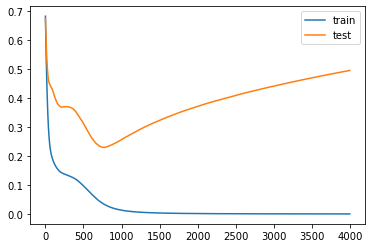

In [17]:
# plot training history with respect to loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

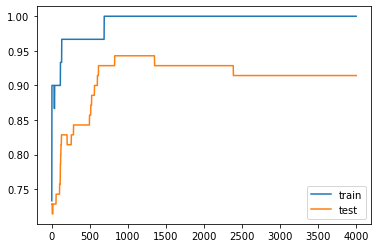

In [18]:
# plot training history with respect to accuracy
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

## 6.3. Overfit MLP with Early Stopping - 1

In [19]:
# mlp overfit on the moons dataset with simple early stopping
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from matplotlib import pyplot

In [20]:
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

In [21]:
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [22]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [24]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=1, callbacks=[es])

Train on 30 samples, validate on 70 samples
Epoch 1/4000
30/30 [==============================] - 0s 8ms/step - loss: 0.7101 - accuracy: 0.1667 - val_loss: 0.6971 - val_accuracy: 0.3286
Epoch 2/4000
30/30 [==============================] - 0s 267us/step - loss: 0.6927 - accuracy: 0.5000 - val_loss: 0.6859 - val_accuracy: 0.6000
Epoch 3/4000
30/30 [==============================] - 0s 267us/step - loss: 0.6757 - accuracy: 0.8000 - val_loss: 0.6752 - val_accuracy: 0.6143
Epoch 4/4000
30/30 [==============================] - 0s 267us/step - loss: 0.6593 - accuracy: 0.8667 - val_loss: 0.6648 - val_accuracy: 0.6857
Epoch 5/4000
30/30 [==============================] - 0s 267us/step - loss: 0.6433 - accuracy: 0.8667 - val_loss: 0.6548 - val_accuracy: 0.6857
Epoch 6/4000
30/30 [==============================] - 0s 0us/step - loss: 0.6278 - accuracy: 0.8333 - val_loss: 0.6453 - val_accuracy: 0.6857
Epoch 7/4000
30/30 [==============================] - 0s 267us/step - loss: 0.6127 - accuracy: 0

Epoch 58/4000
30/30 [==============================] - 0s 267us/step - loss: 0.2465 - accuracy: 0.9000 - val_loss: 0.4611 - val_accuracy: 0.7286
Epoch 59/4000
30/30 [==============================] - 0s 266us/step - loss: 0.2441 - accuracy: 0.9000 - val_loss: 0.4604 - val_accuracy: 0.7286
Epoch 60/4000
30/30 [==============================] - 0s 267us/step - loss: 0.2418 - accuracy: 0.9000 - val_loss: 0.4596 - val_accuracy: 0.7286
Epoch 61/4000
30/30 [==============================] - 0s 267us/step - loss: 0.2396 - accuracy: 0.9000 - val_loss: 0.4588 - val_accuracy: 0.7286
Epoch 62/4000
30/30 [==============================] - 0s 267us/step - loss: 0.2375 - accuracy: 0.9000 - val_loss: 0.4581 - val_accuracy: 0.7286
Epoch 63/4000
30/30 [==============================] - 0s 267us/step - loss: 0.2355 - accuracy: 0.9000 - val_loss: 0.4573 - val_accuracy: 0.7286
Epoch 64/4000
30/30 [==============================] - 0s 267us/step - loss: 0.2335 - accuracy: 0.9000 - val_loss: 0.4565 - val_ac

Epoch 115/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1811 - accuracy: 0.9000 - val_loss: 0.4199 - val_accuracy: 0.7429
Epoch 116/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1804 - accuracy: 0.9000 - val_loss: 0.4191 - val_accuracy: 0.7429
Epoch 117/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1798 - accuracy: 0.9000 - val_loss: 0.4183 - val_accuracy: 0.7429
Epoch 118/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1792 - accuracy: 0.9333 - val_loss: 0.4176 - val_accuracy: 0.7429
Epoch 119/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1786 - accuracy: 0.9333 - val_loss: 0.4168 - val_accuracy: 0.7571
Epoch 120/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1780 - accuracy: 0.9333 - val_loss: 0.4160 - val_accuracy: 0.7571
Epoch 121/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1775 - accuracy: 0.9333 - val_loss: 0.4152 - v

Epoch 172/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1548 - accuracy: 0.9667 - val_loss: 0.3819 - val_accuracy: 0.8286
Epoch 173/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1545 - accuracy: 0.9667 - val_loss: 0.3814 - val_accuracy: 0.8286
Epoch 174/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1542 - accuracy: 0.9667 - val_loss: 0.3809 - val_accuracy: 0.8286
Epoch 175/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1538 - accuracy: 0.9667 - val_loss: 0.3805 - val_accuracy: 0.8286
Epoch 176/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1535 - accuracy: 0.9667 - val_loss: 0.3801 - val_accuracy: 0.8286
Epoch 177/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1532 - accuracy: 0.9667 - val_loss: 0.3796 - val_accuracy: 0.8286
Epoch 178/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1529 - accuracy: 0.9667 - val_loss: 0.3792 - v

In [25]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.967, Test: 0.814


In [26]:
history.history;

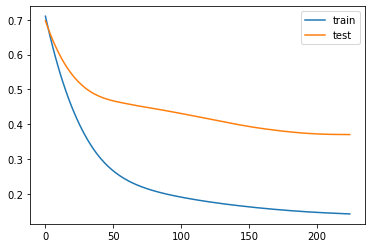

In [27]:
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## 6.4. Overfit MLP with Early Stopping - 2

In [28]:
# mlp overfit on the moons dataset with patient early stopping
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from matplotlib import pyplot

In [29]:
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

In [30]:
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [31]:
# # define model acc=0.943(e.g.)
# model = Sequential()
# model.add(Dense(500, input_dim=2, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
# another way to define a modelacc=0.943 (e.g.)
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
# patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

In [34]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=1, callbacks=[es])

Train on 30 samples, validate on 70 samples
Epoch 1/4000
30/30 [==============================] - 0s 5ms/step - loss: 0.6455 - accuracy: 0.8667 - val_loss: 0.6504 - val_accuracy: 0.6857
Epoch 2/4000
30/30 [==============================] - 0s 349us/step - loss: 0.6227 - accuracy: 0.8333 - val_loss: 0.6383 - val_accuracy: 0.6857
Epoch 3/4000
30/30 [==============================] - 0s 533us/step - loss: 0.6039 - accuracy: 0.8333 - val_loss: 0.6260 - val_accuracy: 0.6857
Epoch 4/4000
30/30 [==============================] - 0s 533us/step - loss: 0.5847 - accuracy: 0.8333 - val_loss: 0.6132 - val_accuracy: 0.6857
Epoch 5/4000
30/30 [==============================] - 0s 267us/step - loss: 0.5644 - accuracy: 0.8667 - val_loss: 0.6010 - val_accuracy: 0.7000
Epoch 6/4000
30/30 [==============================] - 0s 267us/step - loss: 0.5450 - accuracy: 0.8667 - val_loss: 0.5896 - val_accuracy: 0.7143
Epoch 7/4000
30/30 [==============================] - 0s 534us/step - loss: 0.5264 - accuracy:

Epoch 58/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1970 - accuracy: 0.9000 - val_loss: 0.4350 - val_accuracy: 0.7429
Epoch 59/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1955 - accuracy: 0.9000 - val_loss: 0.4341 - val_accuracy: 0.7429
Epoch 60/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1941 - accuracy: 0.9000 - val_loss: 0.4332 - val_accuracy: 0.7429
Epoch 61/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1928 - accuracy: 0.9000 - val_loss: 0.4323 - val_accuracy: 0.7429
Epoch 62/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1914 - accuracy: 0.9000 - val_loss: 0.4313 - val_accuracy: 0.7429
Epoch 63/4000
30/30 [==============================] - 0s 533us/step - loss: 0.1901 - accuracy: 0.9000 - val_loss: 0.4303 - val_accuracy: 0.7429
Epoch 64/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1889 - accuracy: 0.9000 - val_loss: 0.4293 - val_accura

Epoch 115/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1508 - accuracy: 0.9667 - val_loss: 0.3744 - val_accuracy: 0.8286
Epoch 116/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1504 - accuracy: 0.9667 - val_loss: 0.3738 - val_accuracy: 0.8286
Epoch 117/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1500 - accuracy: 0.9667 - val_loss: 0.3733 - val_accuracy: 0.8286
Epoch 118/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1495 - accuracy: 0.9667 - val_loss: 0.3729 - val_accuracy: 0.8286
Epoch 119/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1491 - accuracy: 0.9667 - val_loss: 0.3724 - val_accuracy: 0.8286
Epoch 120/4000
30/30 [==============================] - 0s 42us/step - loss: 0.1487 - accuracy: 0.9667 - val_loss: 0.3719 - val_accuracy: 0.8286
Epoch 121/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1483 - accuracy: 0.9667 - val_loss: 0.3715 - val_accu

Epoch 172/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1356 - accuracy: 0.9667 - val_loss: 0.3643 - val_accuracy: 0.8286
Epoch 173/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1354 - accuracy: 0.9667 - val_loss: 0.3643 - val_accuracy: 0.8286
Epoch 174/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1353 - accuracy: 0.9667 - val_loss: 0.3643 - val_accuracy: 0.8429
Epoch 175/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1351 - accuracy: 0.9667 - val_loss: 0.3643 - val_accuracy: 0.8429
Epoch 176/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1349 - accuracy: 0.9667 - val_loss: 0.3643 - val_accuracy: 0.8429
Epoch 177/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1348 - accuracy: 0.9667 - val_loss: 0.3643 - val_accuracy: 0.8429
Epoch 178/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1346 - accuracy: 0.9667 - val_loss: 0.3643 - v

Epoch 229/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1261 - accuracy: 0.9667 - val_loss: 0.3580 - val_accuracy: 0.8429
Epoch 230/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1259 - accuracy: 0.9667 - val_loss: 0.3578 - val_accuracy: 0.8429
Epoch 231/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1257 - accuracy: 0.9667 - val_loss: 0.3575 - val_accuracy: 0.8429
Epoch 232/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1256 - accuracy: 0.9667 - val_loss: 0.3573 - val_accuracy: 0.8429
Epoch 233/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1254 - accuracy: 0.9667 - val_loss: 0.3572 - val_accuracy: 0.8429
Epoch 234/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1252 - accuracy: 0.9667 - val_loss: 0.3570 - val_accuracy: 0.8429
Epoch 235/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1250 - accuracy: 0.9667 - val_loss: 0.3567 - v

Epoch 286/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1139 - accuracy: 0.9667 - val_loss: 0.3375 - val_accuracy: 0.8429
Epoch 287/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1136 - accuracy: 0.9667 - val_loss: 0.3369 - val_accuracy: 0.8429
Epoch 288/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1133 - accuracy: 0.9667 - val_loss: 0.3363 - val_accuracy: 0.8429
Epoch 289/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1130 - accuracy: 0.9667 - val_loss: 0.3356 - val_accuracy: 0.8429
Epoch 290/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1128 - accuracy: 0.9667 - val_loss: 0.3350 - val_accuracy: 0.8429
Epoch 291/4000
30/30 [==============================] - 0s 0us/step - loss: 0.1125 - accuracy: 0.9667 - val_loss: 0.3344 - val_accuracy: 0.8429
Epoch 292/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1122 - accuracy: 0.9667 - val_loss: 0.3339 - v

Epoch 343/4000
30/30 [==============================] - 0s 111us/step - loss: 0.0952 - accuracy: 0.9667 - val_loss: 0.3010 - val_accuracy: 0.8857
Epoch 344/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0949 - accuracy: 0.9667 - val_loss: 0.3003 - val_accuracy: 0.8857
Epoch 345/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0945 - accuracy: 0.9667 - val_loss: 0.2995 - val_accuracy: 0.8857
Epoch 346/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0941 - accuracy: 0.9667 - val_loss: 0.2987 - val_accuracy: 0.8857
Epoch 347/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0937 - accuracy: 0.9667 - val_loss: 0.2980 - val_accuracy: 0.8857
Epoch 348/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0933 - accuracy: 0.9667 - val_loss: 0.2973 - val_accuracy: 0.8857
Epoch 349/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0929 - accuracy: 0.9667 - val_loss: 0.2967 - val_a

Epoch 400/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0722 - accuracy: 0.9667 - val_loss: 0.2628 - val_accuracy: 0.9143
Epoch 401/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0717 - accuracy: 0.9667 - val_loss: 0.2622 - val_accuracy: 0.9143
Epoch 402/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0713 - accuracy: 0.9667 - val_loss: 0.2616 - val_accuracy: 0.9143
Epoch 403/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0709 - accuracy: 0.9667 - val_loss: 0.2609 - val_accuracy: 0.9143
Epoch 404/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0705 - accuracy: 0.9667 - val_loss: 0.2604 - val_accuracy: 0.9143
Epoch 405/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0701 - accuracy: 0.9667 - val_loss: 0.2598 - val_accuracy: 0.9143
Epoch 406/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0698 - accuracy: 0.9667 - val_loss: 0.2593 - v

Epoch 457/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0511 - accuracy: 0.9667 - val_loss: 0.2378 - val_accuracy: 0.9286
Epoch 458/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0508 - accuracy: 0.9667 - val_loss: 0.2375 - val_accuracy: 0.9286
Epoch 459/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0505 - accuracy: 0.9667 - val_loss: 0.2372 - val_accuracy: 0.9286
Epoch 460/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0501 - accuracy: 0.9667 - val_loss: 0.2371 - val_accuracy: 0.9286
Epoch 461/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0498 - accuracy: 0.9667 - val_loss: 0.2369 - val_accuracy: 0.9286
Epoch 462/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0495 - accuracy: 0.9667 - val_loss: 0.2367 - val_accuracy: 0.9286
Epoch 463/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0492 - accuracy: 1.0000 - val_loss: 0.2364 -

Epoch 514/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0355 - accuracy: 1.0000 - val_loss: 0.2292 - val_accuracy: 0.9286
Epoch 515/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0353 - accuracy: 1.0000 - val_loss: 0.2292 - val_accuracy: 0.9286
Epoch 516/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0351 - accuracy: 1.0000 - val_loss: 0.2292 - val_accuracy: 0.9286
Epoch 517/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0349 - accuracy: 1.0000 - val_loss: 0.2291 - val_accuracy: 0.9286
Epoch 518/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0346 - accuracy: 1.0000 - val_loss: 0.2291 - val_accuracy: 0.9286
Epoch 519/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0344 - accuracy: 1.0000 - val_loss: 0.2291 - val_accuracy: 0.9286
Epoch 520/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0342 - accuracy: 1.0000 - val_loss: 0.2291 -

Epoch 571/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0249 - accuracy: 1.0000 - val_loss: 0.2340 - val_accuracy: 0.9429
Epoch 572/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0247 - accuracy: 1.0000 - val_loss: 0.2341 - val_accuracy: 0.9429
Epoch 573/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0246 - accuracy: 1.0000 - val_loss: 0.2343 - val_accuracy: 0.9429
Epoch 574/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0244 - accuracy: 1.0000 - val_loss: 0.2345 - val_accuracy: 0.9429
Epoch 575/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0243 - accuracy: 1.0000 - val_loss: 0.2347 - val_accuracy: 0.9429
Epoch 576/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0241 - accuracy: 1.0000 - val_loss: 0.2349 - val_accuracy: 0.9429
Epoch 577/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0240 - accuracy: 1.0000 - val_loss: 0.2352 - v

Epoch 628/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0176 - accuracy: 1.0000 - val_loss: 0.2452 - val_accuracy: 0.9429
Epoch 629/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0175 - accuracy: 1.0000 - val_loss: 0.2454 - val_accuracy: 0.9429
Epoch 630/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0174 - accuracy: 1.0000 - val_loss: 0.2456 - val_accuracy: 0.9429
Epoch 631/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0173 - accuracy: 1.0000 - val_loss: 0.2458 - val_accuracy: 0.9429
Epoch 632/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0172 - accuracy: 1.0000 - val_loss: 0.2460 - val_accuracy: 0.9429
Epoch 633/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 0.2463 - val_accuracy: 0.9429
Epoch 634/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0170 - accuracy: 1.0000 - val_loss: 0.2465 -

Epoch 685/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 0.2582 - val_accuracy: 0.9429
Epoch 686/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 0.2585 - val_accuracy: 0.9429
Epoch 687/4000
30/30 [==============================] - 0s 0us/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 0.2587 - val_accuracy: 0.9429
Epoch 688/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 0.2589 - val_accuracy: 0.9429
Epoch 689/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.2592 - val_accuracy: 0.9429
Epoch 690/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.2594 - val_accuracy: 0.9429
Epoch 691/4000
30/30 [==============================] - 0s 304us/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 0.2597 - val_a

In [35]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.943


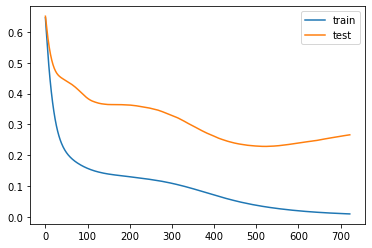

In [36]:
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## 6.5. Overfit MLP with Early Stopping - 3